# Logistic Regression

## Import packages and dataset

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('titanic_train.csv') # Training set is already available
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check basic info about the data set including missing value

In [3]:
print(train.shape)
t=train.info()


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [310]:
d=train.describe()
d

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory analysis and plots

**Plot a bar diagram to check the number of numeric entries**



In [5]:
d

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Bar plot of the count of numeric features')

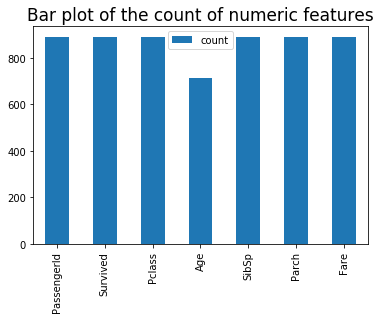

In [6]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

In [7]:
no_of_nulls = {}
for i in train.columns.tolist():
    no_of_nulls[i] = train[i].isnull().sum()

In [8]:
no_of_nulls = pd.DataFrame(no_of_nulls, index = [0])
nulls = no_of_nulls.T

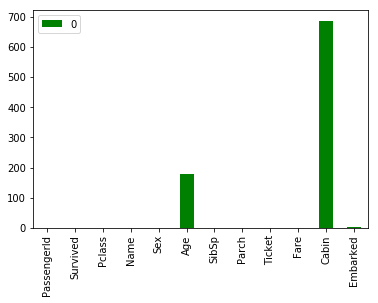

In [9]:
nulls.plot(kind = 'bar', color = 'green')
plt.show()

# Simillary you can plot mean, meadian, quantiles, or anything you want

**Check the relative size of survived and not-survived**

In [311]:
non_nums = train.select_dtypes(include = [np.object])

In [312]:
analyzable_categorical_columns = {}
for i in train.columns:
    if(train[i].value_counts().shape[0] < 10):
        analyzable_categorical_columns[i] = train[i].value_counts().shape[0]

In [313]:
analyzable_columns_value_counts = pd.DataFrame(analyzable_categorical_columns, index = [0]).T

In [314]:
analyzable_columns_value_counts

,0
Survived,2
Pclass,3
Sex,2
SibSp,7
Parch,7
Embarked,3


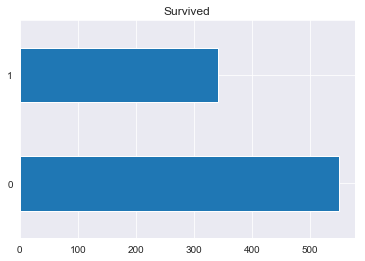

Total number if non null values in  Survived  is  891


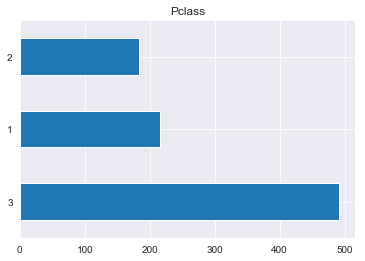

Total number if non null values in  Pclass  is  891


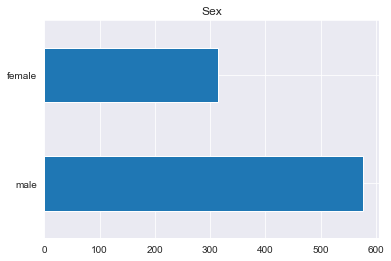

Total number if non null values in  Sex  is  891


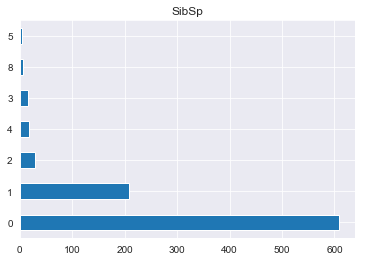

Total number if non null values in  SibSp  is  891


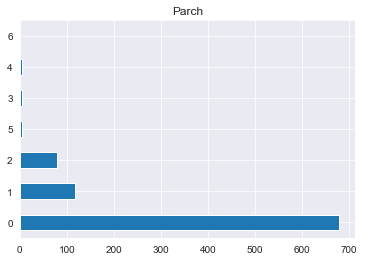

Total number if non null values in  Parch  is  891


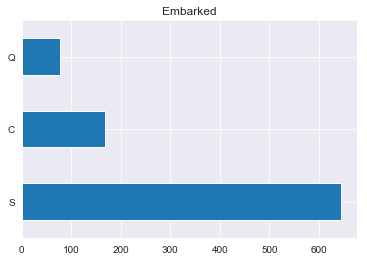

Total number if non null values in  Embarked  is  889


In [315]:
for i in analyzable_columns_value_counts.index:
    train[i].value_counts().plot(kind = 'barh')
    plt.title(i)
    plt.show()
    print("Total number if non null values in ", i ," is ", (train.shape[0]-train[i].isnull().sum()))

### Having seen the story on how counts under each section, Let's check the counts Vs Survived, Fasten your seat belts :D 

#### This notebook is going to have  a good amount of sns also so Takeaway :D

In [15]:
# The following is a simple count plot based on Survival

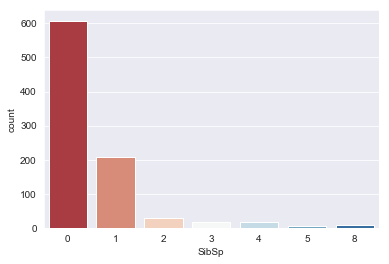

In [316]:
sns.set_style('darkgrid')
sns.countplot(x='SibSp',data=train,palette='RdBu')
plt.show()

**Is there a pattern for the survivability based on sex?**

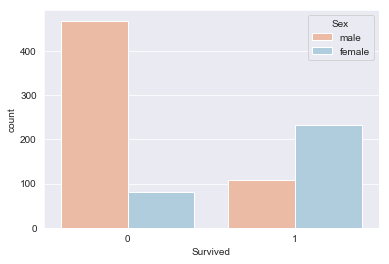

In [317]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu')
plt.show()

**What about any pattern related to passenger class?**

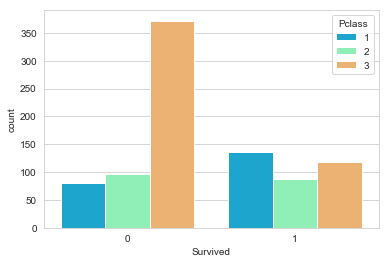

In [318]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

**Following code extracts and plots the average of passenger count that survived, by each class**

Text(0.5,1,'Fraction of passengers survived by class')

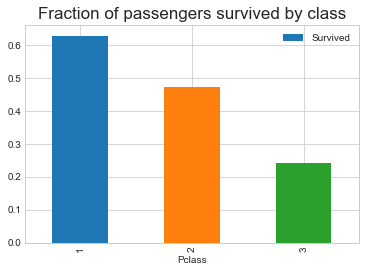

In [9]:
f_class_survived=train.groupby('Pclass')['Survived'].mean()
f_class_survived = pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='Survived')
plt.title("Fraction of passengers survived by class",fontsize=17)

In [45]:
pclass_survived  = train.groupby(['Pclass','Survived']).count()

In [319]:
survivers_under_each_class = []
non_survivers_under_each_class = []
for i in range(3):
    i += 1
    survivers_under_each_class.append(pclass_survived.loc[(i,1),'PassengerId'])    
    non_survivers_under_each_class.append(pclass_survived.loc[(i,0),'PassengerId'])

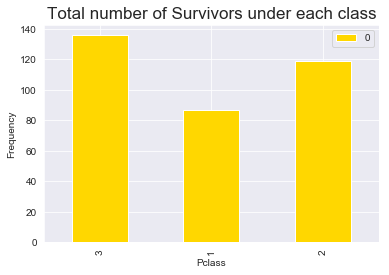

In [78]:
pd.DataFrame(survivers_under_each_class, index = train['Pclass'].value_counts().index).plot(kind = 'bar', color = 'gold')
plt.title('Total number of Survivors under each class', fontsize = 17)
plt.ylabel('Frequency')
plt.xlabel('Pclass')
plt.show()

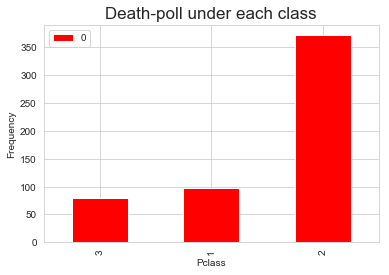

In [320]:
pd.DataFrame(non_survivers_under_each_class, index = train['Pclass'].value_counts().index).plot(kind = 'bar', color = 'red')
plt.title('Death-poll under each class', fontsize = 17)
plt.ylabel('Frequency')
plt.xlabel('Pclass')
plt.show()

**What about any pattern related to having sibling and spouse?**

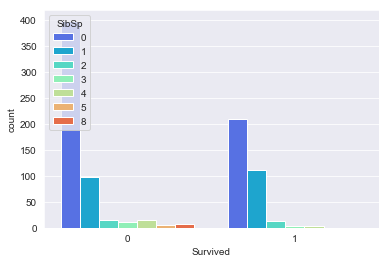

In [321]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='SibSp',data=train,palette='rainbow')
plt.show()

**How does the overall age distribution look like?**

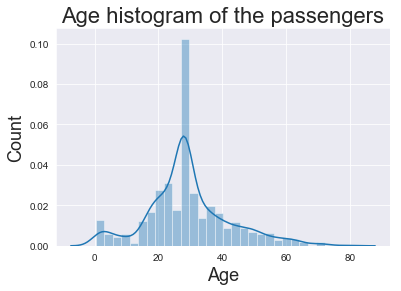

In [322]:
plt.xlabel("Age of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Age histogram of the passengers",fontsize=22)
train['Age'] = train['Age'].fillna(train['Age'].median(), inplace = False)
sns.distplot(train['Age'])
plt.show()

**How does the age distribution look like across passenger class?**

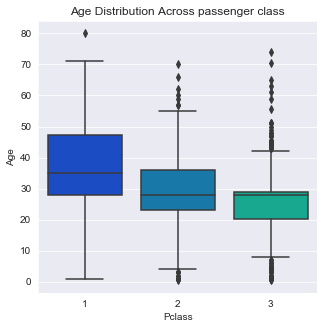

In [323]:
plt.figure(figsize=(5, 5))
plt.title("Age Distribution Across passenger class", fontsize = 12)
plt.xlabel("Passenger Class",fontsize=10)
plt.ylabel("Age",fontsize=10)
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
plt.show()

Text(0.5, 0, 'Passenger class')

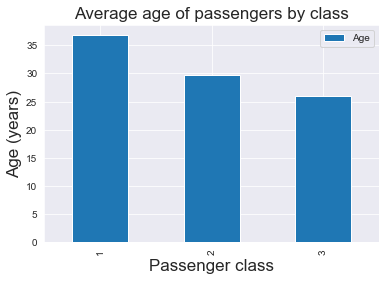

In [324]:
f_class_Age=train.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='Age')
plt.title("Average age of passengers by class",fontsize=17)
plt.ylabel("Age (years)", fontsize=17)
plt.xlabel("Passenger class", fontsize=17)

### You can do as much as EDA you want there is not limit for creativity

In [326]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [327]:
# We can see that there are 687 nulls in cabin and that can dropped
train = train.drop('Cabin', axis =1)

In [328]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = False)

### Drop other unnecessary features like 'PassengerId', 'Name', 'Ticket'

In [329]:
#train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Convert categorial feature like 'Sex' and 'Embarked' to dummy variables

**Use pandas 'get_dummies()' function**

In [330]:
train = pd.get_dummies(train, columns=['Sex'],drop_first=True)
train = pd.get_dummies(train, columns=['Embarked'],drop_first=True)

In [351]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,1,0,1


This data set is now ready for logistic regression analysis!

## Logistic Regression model fit and prediction
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

In [346]:
train.drop('Name', axis = 1, inplace = True)

In [352]:
train.drop('Ticket', axis = 1, inplace = True)

In [353]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=111)

In [354]:
from sklearn.linear_model import LogisticRegression

In [355]:
lr_clf = LogisticRegression()

In [356]:
lr_clf.fit(X_train, y_train)

C:\Users\w4025\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [357]:
y_pred = lr_clf.predict(X_test) # Default cut off beacuse .predict()

In [358]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

In [359]:
confusion_matrix(y_pred, y_test)

array([[147,  33],
       [ 24,  64]], dtype=int64)

In [361]:
accuracy_score(y_pred,y_test)

0.7873134328358209

In [362]:
fpr, tpr, tres = roc_curve(y_pred, y_test)

In [366]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

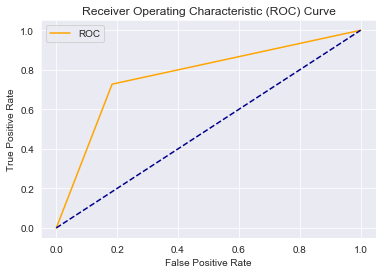

In [367]:
plot_roc_curve(fpr, tpr)

    # Logistic Regression using proba_predict

In [368]:
probs_of_1 = lr_clf.predict_proba(X_test)[:, 1] 

In [369]:
probs_of_1

array([0.58481563, 0.73549284, 0.99204585, 0.13497552, 0.11410306,
       0.28366496, 0.11658474, 0.92507278, 0.15412238, 0.77621911,
       0.31755687, 0.13181468, 0.75215343, 0.81858065, 0.19427616,
       0.40535581, 0.92129348, 0.13246872, 0.24342005, 0.70506169,
       0.70874879, 0.29730402, 0.12697609, 0.05576865, 0.15398001,
       0.184999  , 0.15788536, 0.75401021, 0.17854524, 0.14891922,
       0.87289578, 0.49974297, 0.77789642, 0.16485469, 0.13512932,
       0.40036348, 0.82589233, 0.34175442, 0.89182248, 0.12740096,
       0.10422862, 0.27289728, 0.81633971, 0.24327965, 0.13878431,
       0.28226707, 0.65455283, 0.44640776, 0.79016085, 0.39357823,
       0.09065155, 0.43315773, 0.70322241, 0.11849508, 0.62391825,
       0.09820699, 0.16331668, 0.19012833, 0.10774974, 0.68189012,
       0.22284834, 0.38989279, 0.12879804, 0.11343239, 0.63803575,
       0.87677239, 0.11296402, 0.08838895, 0.18105669, 0.12932991,
       0.37139871, 0.31713049, 0.12858134, 0.36372229, 0.18053

In [370]:
thresholds = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [371]:
theshs = {}
for j in thresholds:
    x = list(probs_of_1)
    for i in range(len(x)):
        if (x[i] > j):
            x[i] = 1
        else:
            x[i] = 0
    theshs[j] = x

In [372]:
acc = []
for i in theshs.values():
    acc.append(accuracy_score(np.array(i).astype(int), y_test))

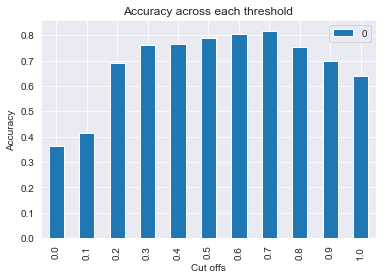

In [373]:
pd.DataFrame(acc, index = theshs.keys()).plot(kind = 'bar')
plt.title("Accuracy across each threshold")
plt.xlabel("Cut offs")
plt.ylabel("Accuracy")
plt.show()

This is the ROC curve  0.0 th cut off
nan  Is the area under the curve


C:\Users\w4025\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:648: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\w4025\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:114: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


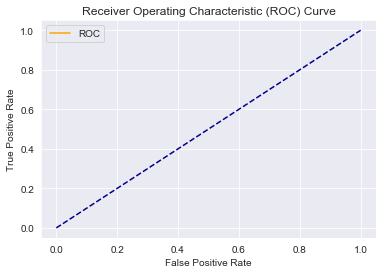

This is the ROC curve  0.1 th cut off
0.6344444444444444  Is the area under the curve


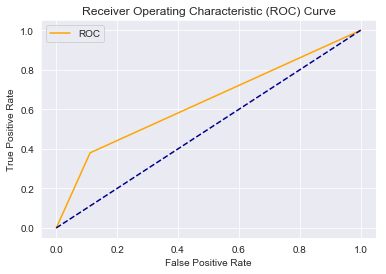

This is the ROC curve  0.2 th cut off
0.7157097288676235  Is the area under the curve


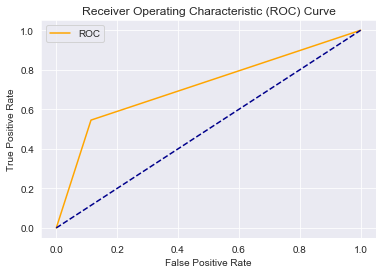

This is the ROC curve  0.3 th cut off
0.751555929352397  Is the area under the curve


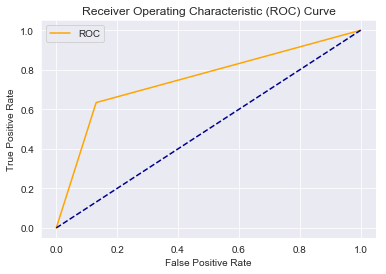

This is the ROC curve  0.4 th cut off
0.7459839357429718  Is the area under the curve


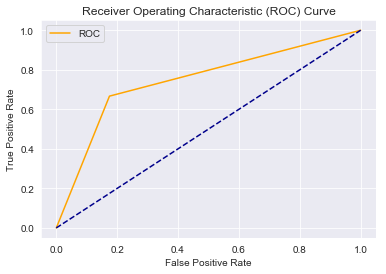

This is the ROC curve  0.5 th cut off
0.771969696969697  Is the area under the curve


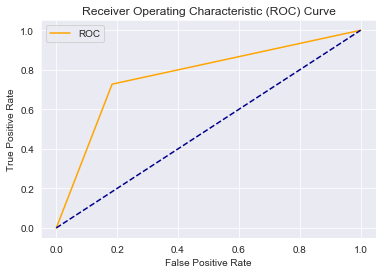

This is the ROC curve  0.6 th cut off
0.8041450777202073  Is the area under the curve


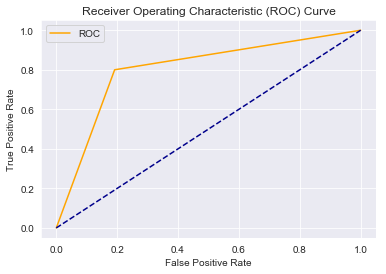

This is the ROC curve  0.7 th cut off
0.8581536388140162  Is the area under the curve


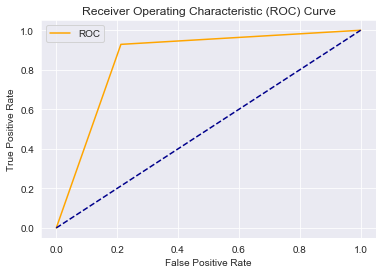

This is the ROC curve  0.8 th cut off
0.8607594936708861  Is the area under the curve


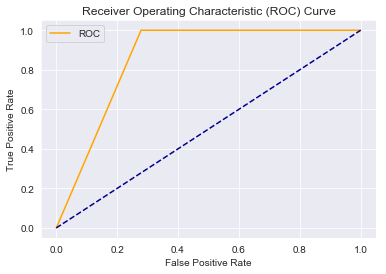

This is the ROC curve  0.9 th cut off
0.8392857142857143  Is the area under the curve


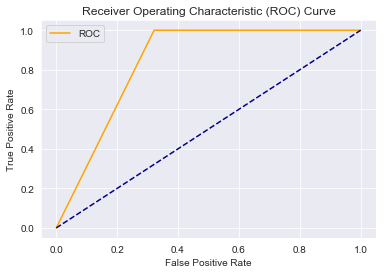

C:\Users\w4025\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


This is the ROC curve  1.0 th cut off
nan  Is the area under the curve


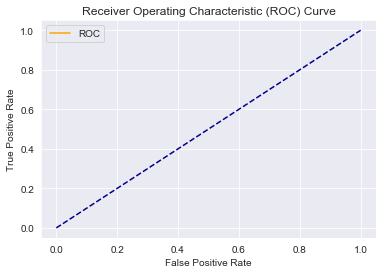

In [374]:
area_under_the_curve = {}
for i in theshs.keys():
    fpr, tpr, tres = roc_curve(np.array(theshs[i]).astype(int), y_test)
    print("This is the ROC curve ", i, "th cut off")
    print(auc(fpr,tpr), " Is the area under the curve")
    plot_roc_curve(fpr, tpr)
    area_under_the_curve[i] = auc(fpr, tpr)

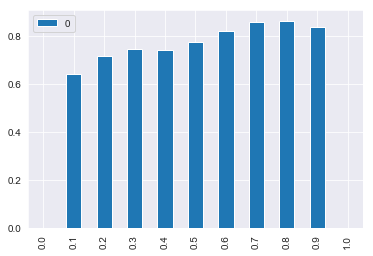

In [307]:
pd.DataFrame(area_under_the_curve, index = [0]).T.plot(kind = 'bar')
plt.show()

# From the AUC, ACCURACY and ROC curve we can select 0.6 as the optimal cut off